<a href="https://colab.research.google.com/github/sakshiii819/Airbnb-Booking-Analysis-Sakshi-Juneja_/blob/main/Teams_Notebook_on_Airbnb_Bookings_Analysis_Capstone_Project(RT).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

###This Team consist of Roshan Tile,Rasik Jain, Nikhil Dutt and Sakshi Juneja

In [ ]:
# Importing the essential library for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# locating and reading the data file on drive for analysis
file_path = '/content/drive/MyDrive/Copy of Airbnb NYC 2019(CP).csv'
df=pd.read_csv(file_path)

In [ ]:
# Checking the data
df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


In [ ]:
#checking the general information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

## From the information obtained from above data. we see that the data contains 48895 records and 16 variables.For our analysis the column 'id' , 'last_review' and 'reviews_per_months sounds irrelevant for our analysis

In [ ]:
# Dropping the columns 'id','last_review and'reviews_per_month'
df.drop(["id",'reviews_per_month','last_review'],axis=1,inplace=True)

In [ ]:
#checking the null values present in the data
df.isnull().sum()

name                              16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [ ]:
# replacing the null value with 'not avaliable' and checking it again.
df['name'].fillna('not avaliable',inplace=True)
df['host_name'].fillna('not avaliable',inplace=True)
df.isnull().sum()

name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
#calculating statiscal data like mean, percentile,min of numerical values from dataframe.
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
#grouping data using host_id, host_name, number_of reviews to know busiest host:
busy_host_df=df.groupby('host_id')['number_of_reviews'].sum().sort_values(ascending=False).reset_index()
name_df=df.groupby('host_id')['host_name'].unique().reset_index()

# Merging the two dataframes using left join
merged_busy_host_df = pd.merge(busy_host_df,name_df, on='host_id', how='inner').iloc[:20].set_index('host_id')
merged_busy_host_df

,number_of_reviews,host_name
host_id,,
37312959,2273,[Maya]
344035,2205,[Brooklyn& Breakfast -Len-]
26432133,2017,[Danielle]
35524316,1971,[Yasu & Akiko]
40176101,1818,[Brady]
4734398,1798,[Jj]
16677326,1355,[Alex And Zeena]
6885157,1346,[Randy]
219517861,1281,[Sonder (NYC)]


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

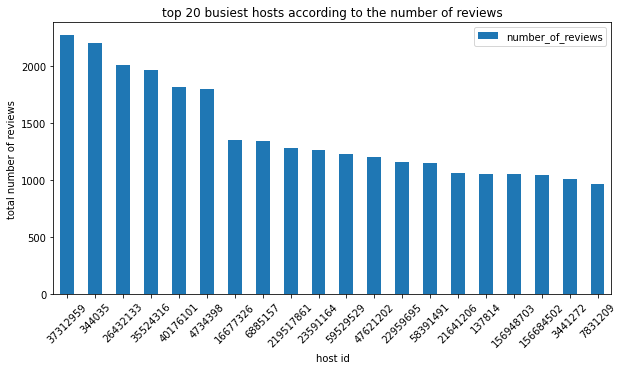

In [ ]:
merged_busy_host_df.plot(kind='bar')

plt.title("top 20 busiest hosts according to the number of reviews")
plt.ylabel('total number of reviews')
plt.xlabel('host id')
plt.rcParams['figure.figsize'] = (10, 5)
plt.xticks(rotation=45)

In [ ]:
# to know maximum number listings of a host
prop_count_df=df.groupby('host_id')['name'].count().sort_values(ascending=False).head(20)
name_df=df.groupby('host_id')['host_name'].unique().reset_index()

# Merging the two dataframes using left join
merged_prop_count_host_df = pd.merge(prop_count_df,name_df, on='host_id', how='inner').iloc[:20].set_index('host_id')
merged_prop_count_host_df

,name,host_name
host_id,,
219517861,327,[Sonder (NYC)]
107434423,232,[Blueground]
30283594,121,[Kara]
137358866,103,[Kazuya]
16098958,96,[Jeremy & Laura]
12243051,96,[Sonder]
61391963,91,[Corporate Housing]
22541573,87,[Ken]
200380610,65,[Pranjal]


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

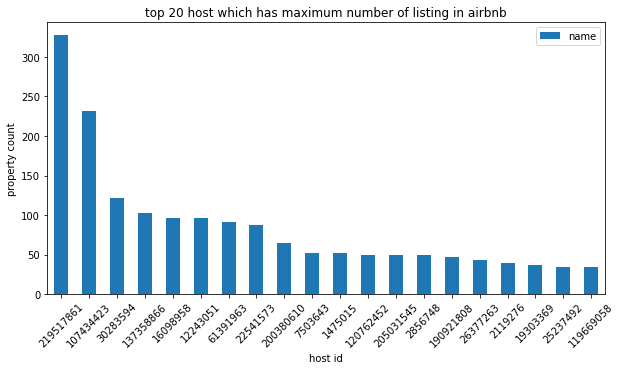

In [ ]:
merged_prop_count_host_df.plot(kind='bar')

plt.title("top 20 host which has maximum number of listing in airbnb")
plt.ylabel('property count')
plt.xlabel('host id')
plt.rcParams['figure.figsize'] = (10, 5)
plt.xticks(rotation=45)

From the above graph we conclude that the busiest host correspond to Host Id '37312959' is MAYA and Host Id '219517861' correspond to SONDER has maximum number of airbnb listings.

In [ ]:
# Checking which area has most number of airbnb
neighbourhood_group_df = df["neighbourhood_group"].value_counts()
neighbourhood_group_df

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

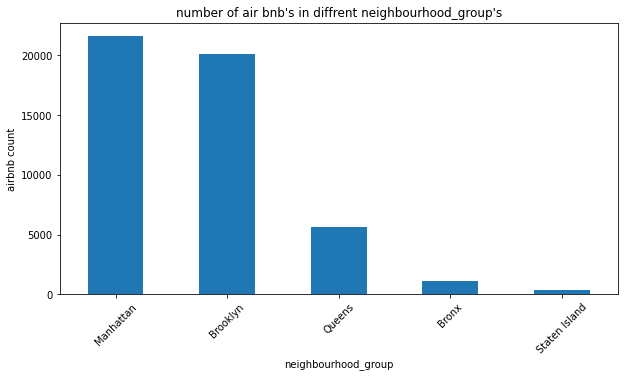

In [ ]:
neighbourhood_group_df.plot(kind='bar')
plt.title("number of air bnb's in diffrent neighbourhood_group's")
plt.ylabel('airbnb count')
plt.xlabel('neighbourhood_group')
plt.xticks(rotation=45)

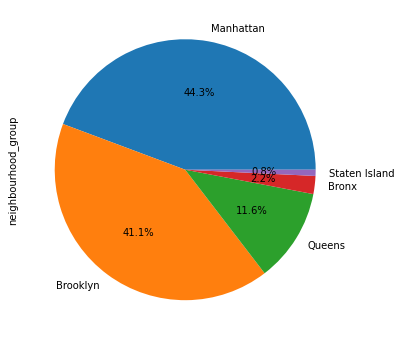

In [ ]:
# pecentage wise airbnb distribution across various neighbourhood groups
plot = neighbourhood_group_df.plot.pie(subplots=True, figsize=(11, 6),autopct='%1.1f%%')

In [ ]:
# to check average price of airbnb according to neighbourhood_group:
avd_price_df=df.groupby('neighbourhood_group')['price'].mean()
avd_price_df

neighbourhood_group
Bronx             87.496792
Brooklyn         124.383207
Manhattan        196.875814
Queens            99.517649
Staten Island    114.812332
Name: price, dtype: float64

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

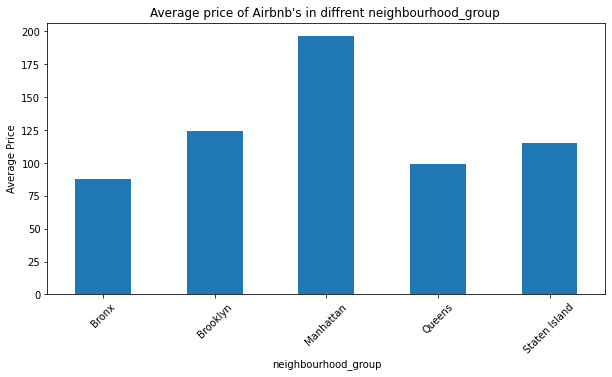

In [ ]:
avd_price_df.plot(kind='bar')
plt.title("Average price of Airbnb's in diffrent neighbourhood_group ")
plt.xlabel('neighbourhood_group')
plt.ylabel('Average Price')
plt.xticks(rotation=45)

In [ ]:
# to know prices of airbnb with respect to geographical location
a=df.loc[df['price']<300,['latitude','longitude','price']]
a


,latitude,longitude,price
0,40.64749,-73.97237,149
1,40.75362,-73.98377,225
2,40.80902,-73.94190,150
3,40.68514,-73.95976,89
4,40.79851,-73.94399,80
...,...,...,...
48890,40.67853,-73.94995,70
48891,40.70184,-73.93317,40
48892,40.81475,-73.94867,115
48893,40.75751,-73.99112,55


(array([-74.3, -74.2, -74.1, -74. , -73.9, -73.8, -73.7, -73.6]),
 <a list of 0 Text major ticklabel objects>)

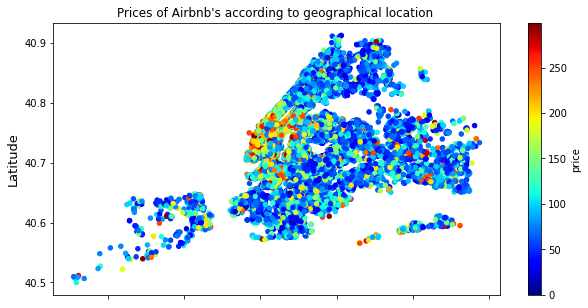

In [ ]:
a.plot(kind='scatter',y='latitude',x='longitude',c='price',figsize=(10,5),alpha=1,cmap=plt.get_cmap('jet'))

plt.title("Prices of Airbnb's according to geographical location ")
plt.ylabel('Latitude',fontsize=13)
plt.xlabel('Longititude',fontsize=13)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

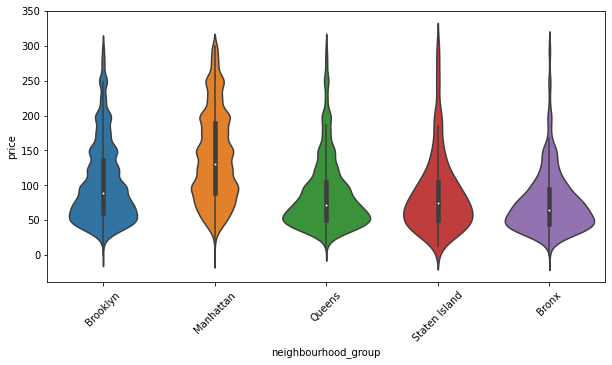

In [ ]:
# checking for price distribution across various regions in newyork
sns.violinplot(data=df[df['price']<300],x='neighbourhood_group',y='price')
plt.xticks(rotation=45)

From the graph its shows that 'Manhattan' has most number of airbnb and average price is higher.The reasoning for that is, it is in central region in newyork and most of the tourist attraction and companies located in that area.Further more we can observe that 'Manhattan' has a wide variety of price ranges avaliable and it has a higher bandwidth in higher price range compared to other region. while 'Bronx' area has a higher bandwidth in lower price range. Thus for a luxurious stay people preffered 'manhattan' while for budget stay people preffers outside area like Statan island,Bronx,Queens. 


In [ ]:
# Checking which area has most traffic based on number of reviews
busy_area_df=df.groupby('neighbourhood_group')['number_of_reviews'].sum().sort_values(ascending=False)
busy_area_df

neighbourhood_group
Brooklyn         486574
Manhattan        454569
Queens           156950
Bronx             28371
Staten Island     11541
Name: number_of_reviews, dtype: int64

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

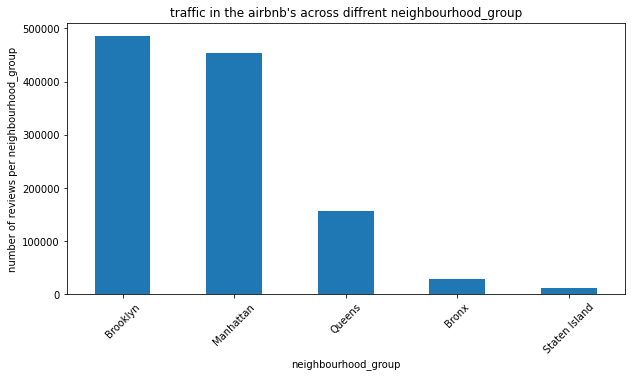

In [ ]:
busy_area_df.plot(kind='bar')
plt.title("traffic in the airbnb's across diffrent neighbourhood_group")
plt.ylabel('number of reviews per neighbourhood_group')
plt.xlabel('neighbourhood_group')
plt.xticks(rotation=45)

In [ ]:
airbnb_by_roomtype=df.groupby(['neighbourhood_group','room_type'])['name'].count().unstack()
airbnb_by_roomtype

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,379,652,60
Brooklyn,9559,10132,413
Manhattan,13199,7982,480
Queens,2096,3372,198
Staten Island,176,188,9


Text(0, 0.5, 'airbnb counts')

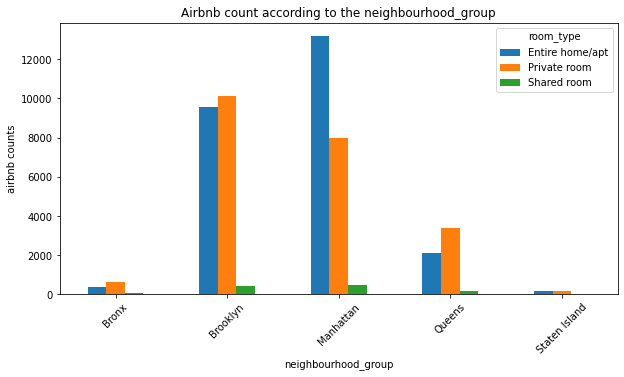

In [ ]:
# checking for Airbnb count in neighbourhood_group according to room_type
airbnb_by_roomtype.plot(kind='bar',figsize=(10,5))
plt.xticks(rotation=45)
plt.title("Airbnb count in neighbourhood_group according to room_type")
plt.xlabel('neighbourhood_group')
plt.ylabel('airbnb counts')

In [ ]:
# to know average price of Airbnb in neighbourhood_group according to room_type
avgprice_roomtype=df.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack()
avgprice_roomtype

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.506596,66.788344,59.800000
Brooklyn,178.327545,76.500099,50.527845
Manhattan,249.239109,116.776622,88.977083
Queens,147.050573,71.762456,69.020202
Staten Island,173.846591,62.292553,57.444444


Text(0, 0.5, 'Average Price')

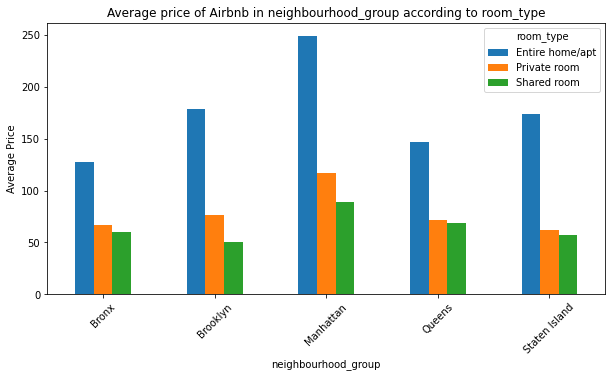

In [ ]:
avgprice_roomtype.plot(kind='bar',figsize=(10,5))
plt.title("Average price of Airbnb in neighbourhood_group according to room_type")
plt.xticks(rotation=45)
plt.xlabel('neighbourhood_group')
plt.ylabel('Average Price')

In [ ]:
# As there are total 221 diffrent entries so we are considering only top 20 entries.
neighbourhood_df = df["neighbourhood"].value_counts().iloc[0:20]
neighbourhood_df

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
East Harlem           1117
Greenpoint            1115
Chelsea               1113
Lower East Side        911
Astoria                900
Washington Heights     899
West Village           768
Financial District     744
Flatbush               621
Clinton Hill           572
Name: neighbourhood, dtype: int64

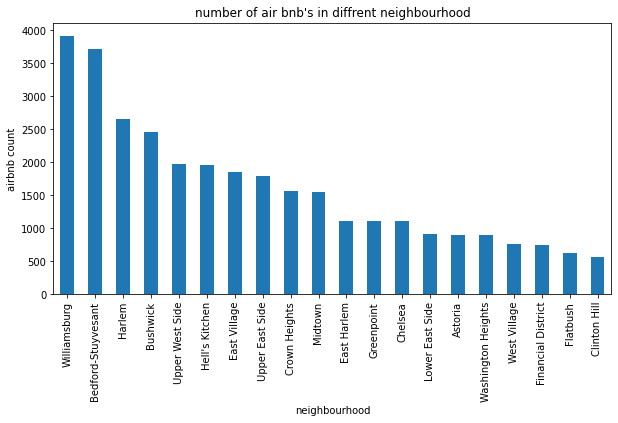

In [ ]:
neighbourhood_df.plot(kind='bar')

plt.title("number of air bnb's in diffrent neighbourhood")
plt.ylabel('airbnb count')
plt.xlabel('neighbourhood')
plt.rcParams['figure.figsize'] = (10, 5)

From the above graphs we see that Brookyln has most traffic. furthermore, 'williamsburg' and 'Bedford-Stuyvesant' neighbourhood has max number of airbnb which also lies in brookyln region. The reasoning for such high traffic in this region is because it is in central area and average price of stay is also less compared to Manhattan. Also, it has more number of private rooms compared to other regions. So, most solo travelers and students preffered these regions.



In [ ]:
# checking for preference of the people for different room types and average price of room types across newyork city
busy_room_type_df=df.groupby('room_type')['number_of_reviews'].sum().sort_values(ascending=False)
busy_room_type_df

room_type
Entire home/apt    580403
Private room       538346
Shared room         19256
Name: number_of_reviews, dtype: int64

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

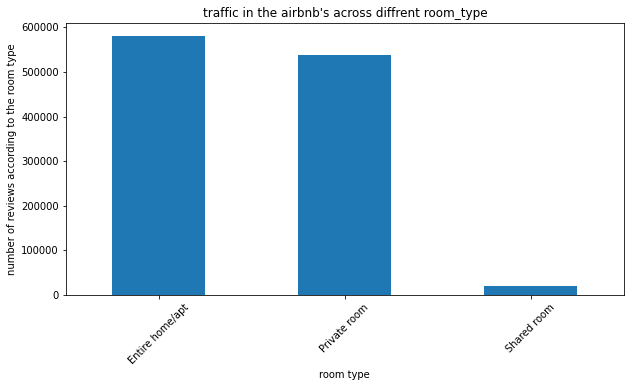

In [ ]:
busy_room_type_df.plot(kind='bar')
plt.title("traffic in the airbnb's across diffrent room_type")
plt.ylabel('number of reviews according to the room type')
plt.xlabel('room type')
plt.xticks(rotation=45)

In [ ]:
#checking average price for different room type:
avgprice_df=df.groupby(by='room_type')['price'].mean().reset_index()
avgprice_df=avgprice_df.set_index('room_type')
avgprice_df

,price
room_type,
Entire home/apt,211.794246
Private room,89.780973
Shared room,70.127586


Text(0.5, 0, 'room_type')

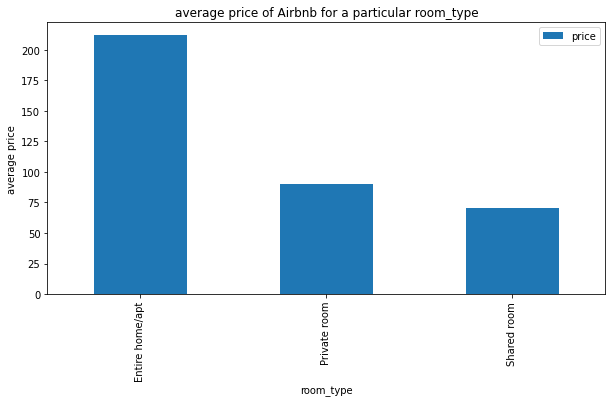

In [ ]:
avgprice_df.plot(kind='bar')
plt.title("average price of Airbnb for a particular room_type")
plt.ylabel('average price')
plt.xlabel('room_type')

In [ ]:
# Price distribution box plot
box_df=df.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack()
box_df

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.506596,66.788344,59.800000
Brooklyn,178.327545,76.500099,50.527845
Manhattan,249.239109,116.776622,88.977083
Queens,147.050573,71.762456,69.020202
Staten Island,173.846591,62.292553,57.444444


Text(0.5, 0, 'room_type')

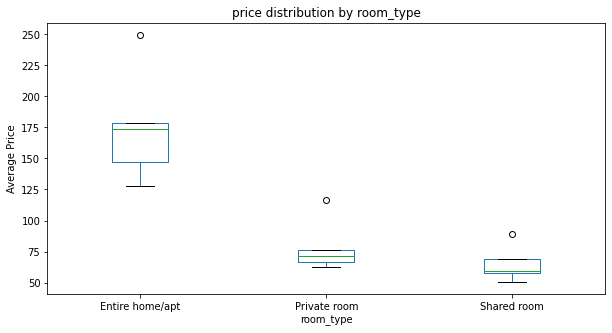

In [ ]:
box_df.plot(kind="box")
plt.title('price distribution by room_type')
plt.ylabel('Average Price')
plt.xlabel('room_type')

From the above graph the lowest value of average price for apartment is higher then the highest average price for private and shared room. the mean price is closer towards the 75% of the total price for apartment. this means property cost for apartment is higher then its intrinsic value.

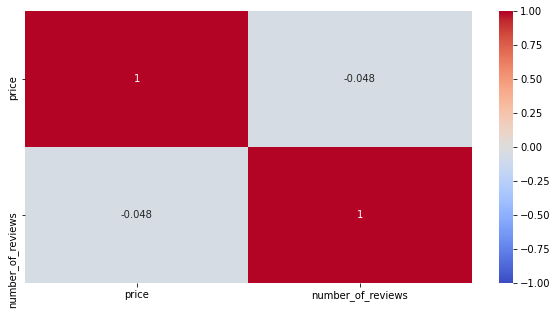

In [ ]:
#checking for correlation between price and reviews
correlation_df=df[['price','number_of_reviews']]
corr_df = correlation_df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr_df,vmin=-1, cmap='coolwarm', annot=True)

There exist a negative correlation between price and review. which is evident from the fact that whenever the price of a Airbnb increases less number of people are interested in to stay.


### Conclusion

Airbnb dataset provides deep insights for locations, people's preference and average rates of different properties across various regions of New York. We first perform a basic check for our data to know how many records and column present in our dataset. Then begin our EDA by looking out for different column to select the most relevant column for our analysis. Then, we perform data cleaning by checking and replacing for any null value present in our dataset which can interfere with our analysis.

First, we checked for hosts which has the maximum number of properties and hosts which has the maximum number of customer by taking the number of reviews into account. we found out that hostname MAYA and SONDER has the maximum number of customers (2273) and properties (327) respectively.

After that, we explore which neighbourhood group has the maximum number of listing and its corresponding average price. we found out 'Manhattan' has 44.3% of the total Airbnb listing and higher average listing price among others and has a maximum number of apartment. This is because it has a good amount of tourist attraction and companies located. We do further analysis on the number of reviews across different zones and found out that Brooklyn has the maximum number of reviews that corresponds to more number of the customer. We plotted a categorial bar graph to dig out the reasoning and found that Brooklyn has the maximum number of private rooms available and the average price is lower compared to manhattan. So, most singles and student preferred this zone. Also, we plotted neighbourhood plots for Airbnb counts and found that Williamsburg and 'Bedford-Stuyvesant' has the highest Airbnb counts and it belongs to the Brooklyn zone.

We performed some additional analysis on people's preferences for different properties types and correlation between price and number of reviews and found that peoples preferred apartments then private or shared rooms in New York. this result in a higher average price of an apartment than its intrinsic value. Also, the correlation between price and reviews is negative indicating higher price having fewer people preference.
overall, we developed a good insight from the Airbnb dataset. This analysis helps us to perform a better business decision, future marketing strategy and much more.